<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/201_CNN_Dogs_and_Cats_Github_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 데이터 셋을 이용한 CNN Modeling
> # Github
## Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [ ]:
import tensorflow as tf

tf.__version__

'2.12.0'

# I. wget From Github
* 'dogs_and_cats_small.zip' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip

--2023-04-04 07:57:44--  https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90618980 (86M) [application/zip]
Saving to: ‘dogs_and_cats_small.zip’

dogs_and_cats_small 100%[===================>]  86.42M   146MB/s    in 0.6s    

2023-04-04 07:57:51 (146 MB/s) - ‘dogs_and_cats_small.zip’ saved [90618980/90618980]



* 다운로드 결과 확인

In [ ]:
!ls -l

total 88500
-rw-r--r-- 1 root root 90618980 Apr  4 07:57 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Mar 31 13:36 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'dogs_and_cats_small.zip'

In [ ]:
!unzip -q /content/dogs_and_cats_small.zip

* 학습 데이터 확인

In [ ]:
!ls -l

total 88512
-rw-r--r-- 1 root root 90618980 Apr  4 07:57 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Mar 31 13:36 sample_data
drwxr-xr-x 4 root root     4096 Apr  4 07:57 test
drwxr-xr-x 4 root root     4096 Apr  4 07:57 train
drwxr-xr-x 4 root root     4096 Apr  4 07:57 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [ ]:
train_dir = '/content/train'
valid_dir = '/content/validation'
test_dir  = '/content/test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# 사람 손으로 개와 고양이를 나눠야 한다
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')   # 2진 분류라서 바이너리, 3개 이상이면 카테고리칼

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 4) Test train_generator

In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [ ]:
labels_batch

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0.], dtype=float32)

# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 11분

In [ ]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 23s 109ms/step - loss: 0.6952 - accuracy: 0.5020 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 11s 105ms/step - loss: 0.6925 - accuracy: 0.5235 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/60
100/100 [==============================] - 11s 107ms/step - loss: 0.6910 - accuracy: 0.5310 - val_loss: 0.7321 - val_accuracy: 0.5000
Epoch 4/60
100/100 [==============================] - 11s 107ms/step - loss: 0.6931 - accuracy: 0.5150 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/60
100/100 [==============================] - 10s 103ms/step - loss: 0.6936 - accuracy: 0.5150 - val_loss: 0.6845 - val_accuracy: 0.5470
Epoch 6/60
100/100 [==============================] - 9s 93ms/step - loss: 0.6781 - accuracy: 0.5535 - val_loss: 0.6698 - val_accuracy: 0.5620
Epoch 7/60
100/100 [==============================] - 10s 103ms/step - loss: 0.6654 - accuracy: 0.5715 - val_loss: 0.6526 - val_accu

> ## 4) 학습 결과 시각화

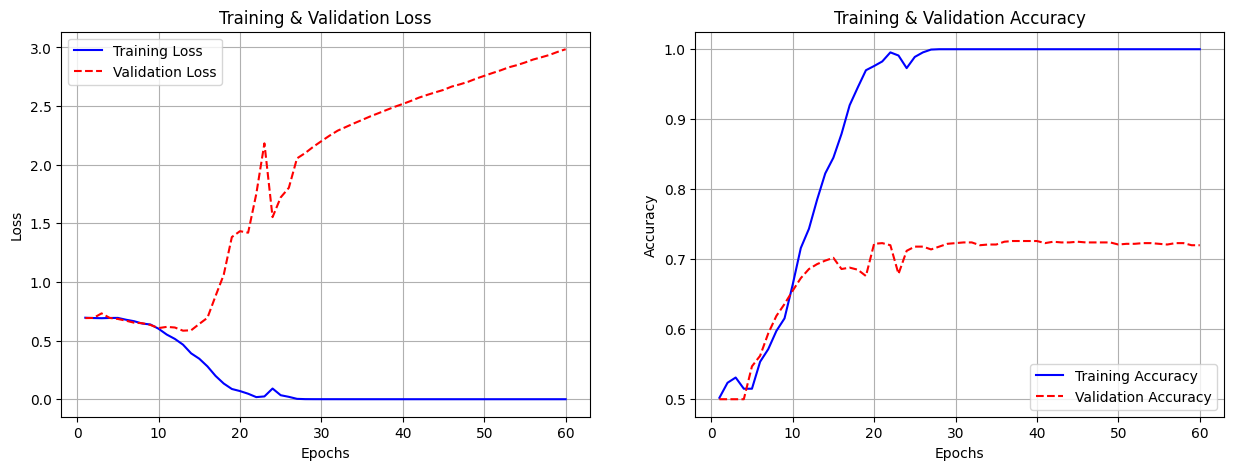

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50,
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.42710
Accuracy = 0.70800


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

* Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* Make 'models' Directory

In [ ]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/models'

> ## 2) Model Save

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [ ]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40558
-rw------- 1 root root    34240 Mar 28 08:45 001_Model_iris.h5
-rw------- 1 root root 41496728 Apr  4 08:11 002_dogs_and_cats_small.h5


> ## 3) Model Load

In [ ]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [ ]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50,
                                      verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.42710
Accuracy = 0.70800


#
#
#
# End Of Document
#
#
#